In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter("ignore")
import altair as alt

In [23]:
df = pd.read_csv('/Users/admin/Downloads/xplicit project/Census and Insurance (Project 2)/insurance.csv')

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| age   | sex    | bmi    | children   | smoker   | region    | medicalCost   |
|:------|:-------|:-------|:-----------|:---------|:----------|:--------------|
| 19    | female | 27.9   | 0          | yes      | southwest | 16884.9       |
| 18    | male   | 33.77  | 1          | no       | southeast | 1725.55       |
| 28    | male   | 33     | 3          | no       | southeast | 4449.46       |
| 33    | male   | 22.705 | 0          | no       | northwest | 21984.5       |
| 32    | male   | 28.88  | 0          | no       | northwest | 3866.86       |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object

In [26]:
# Summary statistics for numerical columns
summary_stats = df[['age', 'bmi', 'children', 'medicalCost']].describe()
print("Summary Statistics for Numerical Columns:")
print(summary_stats.to_markdown(numalign="left", stralign="left"))

# Unique values and most frequent value for categorical columns
for col in ['sex', 'smoker', 'region']:
    unique_values = df[col].unique()
    most_frequent_value = df[col].mode()[0]
    print(f"\nUnique values for '{col}': {unique_values}")
    print(f"Most frequent value for '{col}': {most_frequent_value}")

# Histograms for numerical columns
for col in ['age', 'bmi', 'children', 'medicalCost']:
    chart = alt.Chart(df).mark_bar().encode(
        x=alt.X(col, bin=True, title=col),
        y=alt.Y('count()', title='Frequency'),
        tooltip=[alt.Tooltip(col, bin=True, title=col), 'count()']
    ).properties(
        title=f'Histogram of {col}'
    ).interactive()
    chart.save(f'{col}_histogram.json')
chart.show()

# Box plots of medicalCost by categorical columns
for col in ['sex', 'smoker', 'region']:
    chart = alt.Chart(df).mark_boxplot().encode(
        x=alt.X(col, axis=alt.Axis(title=col)),
        y=alt.Y('medicalCost', axis=alt.Axis(title='Medical Cost')),
        color=col
    ).properties(
        title=f'Medical Cost by {col}'
    ).interactive()
    chart.save(f'medical_cost_by_{col}_boxplot.json')
chart.show()

# Correlation matrix
correlation_matrix = df[['age', 'bmi', 'children', 'medicalCost']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix.to_markdown(numalign="left", stralign="left"))

# Absolute correlations with medicalCost, sorted
correlations_with_medicalCost = correlation_matrix['medicalCost'].abs().sort_values(ascending=False)
print("\nAbsolute Correlations with Medical Cost (Sorted):")
print(correlations_with_medicalCost.to_markdown(numalign="left", stralign="left"))

# Display the sorted correlation values
chart = alt.Chart(correlations_with_medicalCost.reset_index().rename(columns={'index': 'Predictor', 'medicalCost': 'Absolute Correlation'})).mark_bar().encode(
    x=alt.X('Predictor:N', sort='-y', axis=alt.Axis(title='Predictor')),
    y=alt.Y('Absolute Correlation:Q', axis=alt.Axis(title='Absolute Correlation with Medical Cost')),
    tooltip=['Predictor', 'Absolute Correlation']
).properties(
    title='Absolute Correlations with Medical Cost'
).interactive()

chart.save('absolute_correlations_with_medical_cost_bar_chart.json')
chart.show()

Summary Statistics for Numerical Columns:
|       | age    | bmi     | children   | medicalCost   |
|:------|:-------|:--------|:-----------|:--------------|
| count | 1338   | 1338    | 1338       | 1338          |
| mean  | 39.207 | 30.6634 | 1.09492    | 13270.4       |
| std   | 14.05  | 6.09819 | 1.20549    | 12110         |
| min   | 18     | 15.96   | 0          | 1121.87       |
| 25%   | 27     | 26.2963 | 0          | 4740.29       |
| 50%   | 39     | 30.4    | 1          | 9382.03       |
| 75%   | 51     | 34.6938 | 2          | 16639.9       |
| max   | 64     | 53.13   | 5          | 63770.4       |

Unique values for 'sex': ['female' 'male']
Most frequent value for 'sex': male

Unique values for 'smoker': ['yes' 'no']
Most frequent value for 'smoker': no

Unique values for 'region': ['southwest' 'southeast' 'northwest' 'northeast']
Most frequent value for 'region': southeast


alt.Chart(...)

alt.Chart(...)


Correlation Matrix:
|             | age      | bmi       | children   | medicalCost   |
|:------------|:---------|:----------|:-----------|:--------------|
| age         | 1        | 0.109272  | 0.042469   | 0.299008      |
| bmi         | 0.109272 | 1         | 0.0127589  | 0.198341      |
| children    | 0.042469 | 0.0127589 | 1          | 0.0679982     |
| medicalCost | 0.299008 | 0.198341  | 0.0679982  | 1             |

Absolute Correlations with Medical Cost (Sorted):
|             | medicalCost   |
|:------------|:--------------|
| medicalCost | 1             |
| age         | 0.299008      |
| bmi         | 0.198341      |
| children    | 0.0679982     |


alt.Chart(...)

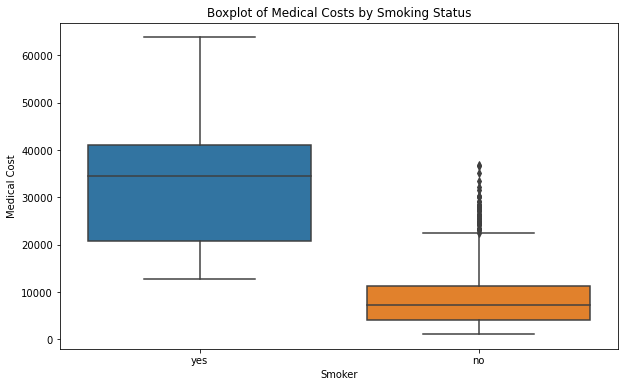

In [27]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='medicalCost', data=df)

# Adding titles and labels
plt.title('Boxplot of Medical Costs by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Medical Cost')

# Display the plot
plt.show()

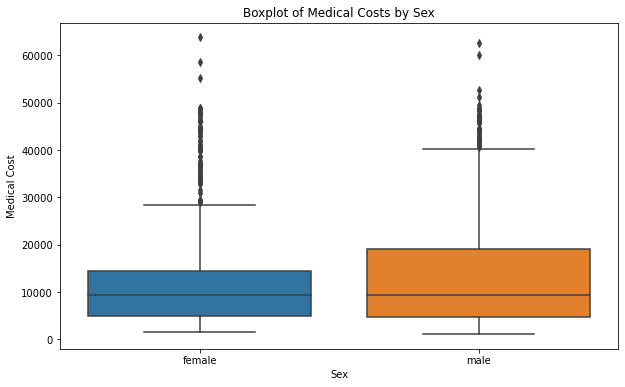

In [28]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='medicalCost', data=df)

# Adding titles and labels
plt.title('Boxplot of Medical Costs by Sex')
plt.xlabel('Sex')
plt.ylabel('Medical Cost')

# Display the plot
plt.show()

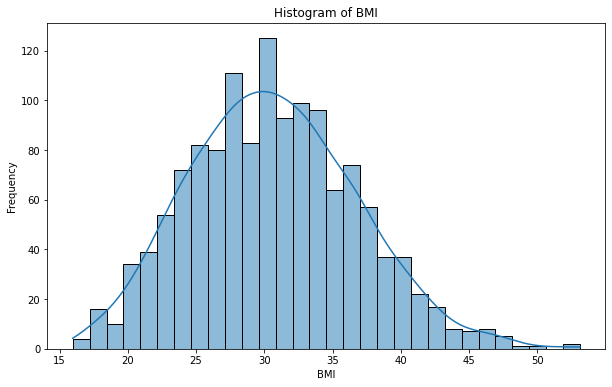

In [29]:

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True)

# Adding titles and labels
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Display the plot
plt.show()

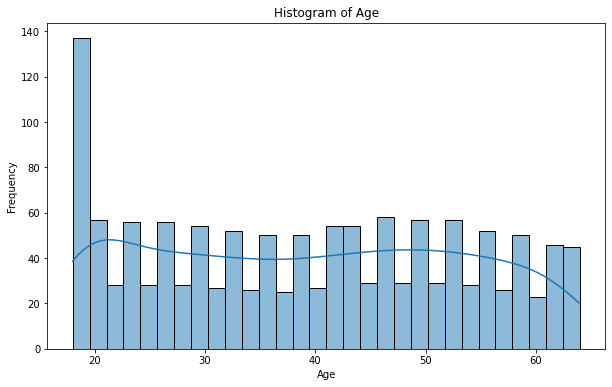

In [30]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)

# Adding titles and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Data Exploration Observations:

### Numerical Variables:

age: Ranges from 18 to 64, with a mean of 39.2. The distribution is fairly uniform across age groups.
bmi: Ranges from 15.96 to 53.13, with a mean of 30.66. The distribution is slightly right-skewed, indicating a higher frequency of individuals with higher BMIs.
children: Ranges from 0 to 5, with most individuals having 0 or 1 child.
medicalCost: Ranges from 1121.87 to 63770.4, with a mean of 13270.4. The distribution is heavily right-skewed, with a few individuals having very high medical costs.
Categorical Variables:

sex: Roughly balanced between 'male' and 'female'.
smoker: The majority of individuals are non-smokers.
region: Fairly even distribution across the four regions, with 'southeast' being the most common.
Visualizations:

Histograms reveal the distributions of numerical variables.
Box plots show the distribution of medical costs across different categories of sex, smoker, and region. Notably, smokers have significantly higher medical costs than non-smokers.
c) Correlation Analysis Conclusions:

The correlation analysis reveals the following relationships between predictors and medicalCost:

age: Moderate positive correlation (0.299). Older individuals tend to have higher medical costs.
bmi: Weak positive correlation (0.198). Higher BMI is associated with slightly higher medical costs.
children: Very weak positive correlation (0.068). The number of children has a negligible impact on medical costs.
smoker (not included in the correlation matrix as it's categorical): The box plots clearly show that smokers have substantially higher medical costs than non-smokers.
d) Top 3 Predictors and Simple Linear Regression:

Based on the correlation analysis, the three best predictors for medical costs are:

smoker (categorical)
age (numerical)
bmi (numerical)

We will now build simple linear regression models for each of these predictors.

# modelling

### Given that one of our predictors (smoker) is categorical, we will need to convert it into a numerical format for the linear regression model. We will do this by creating a dummy variable where 1 represents 'yes' (smoker) and 0 represents 'no' (non-smoker).

Then, we will build and evaluate three simple linear regression models, each using one of the following predictors:

smoker_dummy (the newly created dummy variable)
age
bmi
For each model, we will calculate and display the following statistical performance measures:

Coefficient and intercept
R-squared
P-value of the predictor
We will use these measures to assess the significance and explanatory power of each predictor in relation to medical costs.



In [31]:
import statsmodels.api as sm

# Create dummy variable for smoker
df['smoker_dummy'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# List of predictors
predictors = ['smoker_dummy', 'age', 'bmi']

# Dictionary to store model results
model_results = {}

# Fit simple linear regression models
for predictor in predictors:
    X = df[[predictor]]
    X = sm.add_constant(X)  # Add a constant term for the intercept
    y = df['medicalCost']
    model = sm.OLS(y, X).fit()

    # Extract model results
    coef = model.params[predictor]
    intercept = model.params['const']
    r_squared = model.rsquared
    p_value = model.pvalues[predictor]

    # Store results in dictionary
    model_results[predictor] = {
        'Coefficient': coef,
        'Intercept': intercept,
        'R-squared': r_squared,
        'P-value': p_value
    }

# Print model results
print("Simple Linear Regression Results:")
for predictor, results in model_results.items():
    print(f"\n**Predictor:** {predictor}")
    print(f"  - Coefficient: {results['Coefficient']:.4f}")
    print(f"  - Intercept: {results['Intercept']:.4f}")
    print(f"  - R-squared: {results['R-squared']:.4f}")
    print(f"  - P-value: {results['P-value']:.4f}")

Simple Linear Regression Results:

**Predictor:** smoker_dummy
  - Coefficient: 23615.9635
  - Intercept: 8434.2683
  - R-squared: 0.6198
  - P-value: 0.0000

**Predictor:** age
  - Coefficient: 257.7226
  - Intercept: 3165.8850
  - R-squared: 0.0894
  - P-value: 0.0000

**Predictor:** bmi
  - Coefficient: 393.8730
  - Intercept: 1192.9372
  - R-squared: 0.0393
  - P-value: 0.0000


In [32]:
# Define the results in a dictionary
results = {
    'Predictor': ['smoker_dummy', 'age', 'bmi'],
    'Coefficient': [23615.9635, 257.7226, 393.8730],
    'Intercept': [8434.2683, 3165.8850, 1192.9372],
    'R-squared': [0.6198, 0.0894, 0.0393],
    'P-value': [0.0000, 0.0000, 0.0000]
}

# Create a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)

      Predictor  Coefficient  Intercept  R-squared  P-value
0  smoker_dummy   23615.9635  8434.2683     0.6198      0.0
1           age     257.7226  3165.8850     0.0894      0.0
2           bmi     393.8730  1192.9372     0.0393      0.0


Interpretation:

- smoker_dummy: Being a smoker is associated with a significant increase in medical costs by about $23,615.96, holding other factors constant. This model explains 61.98% of the variance in medical costs
- age: Each additional year of age is associated with an increase in medical costs by $257.72, holding other factors constant. This model explains 8.94% of the variance in medical costs.
bmi: Each unit increase in BMI is associated with an increase in medical costs by $393.87, holding other factors constant. This model explains 3.93% of the variance in medical costs.


### Conclusion:

All three predictors are statistically significant (p-value < 0.05). However, the smoker_dummy variable is the most influential predictor, explaining a much larger proportion of the variance in medical costs compared to age and bmi. This suggests that smoking status is a crucial factor in determining medical expenses.

In [33]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Create dummy variables for categorical columns
df_encoded = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)

# Drop the original 'smoker' column
df_encoded.drop(columns=['smoker'], inplace=True)

# Update all_predictors to include smoker_dummy
all_predictors = [col for col in df_encoded.columns if col != 'medicalCost']

# Fit multivariate regression models and store results
multivariate_model_results = {}
for i, predictors in enumerate([predictors_1, predictors_2]):
    # Update predictors within the loop
    predictors = [p if p != 'smoker' else 'smoker_dummy' for p in predictors]

    X = df_encoded[predictors].to_numpy(dtype=np.float64)  # Convert to numpy array of type float64
    y = df_encoded['medicalCost'].to_numpy()  # Convert to numpy array

    # Replace infinite values with NaN
    X = np.where(np.isinf(X), np.nan, X)

    # Drop rows with missing values
    mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
    X = X[mask]
    y = y[mask]

    model = sm.OLS(y, X).fit()  # Fit without explicitly adding a constant

    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    model_name = f"Model {i+1}"  # Model 1 or Model 2
    multivariate_model_results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Re-fit simple linear regression models using smoker_dummy
model_results = {}
for predictor in predictors_1:  # Use predictors_1 for simple models
    X = df_encoded[[predictor]]
    X = sm.add_constant(X)  # Add a constant term for the intercept
    y = df_encoded['medicalCost']
    model = sm.OLS(y, X).fit()

    # Extract model results
    coef = model.params[predictor]
    intercept = model.params['const']
    r_squared = model.rsquared
    p_value = model.pvalues[predictor]

    # Store results in dictionary
    model_results[predictor] = {
        'Coefficient': coef,
        'Intercept': intercept,
        'R-squared': r_squared,
        'P-value': p_value
    }

# Print evaluation metrics for multivariate regression models
print("\nEvaluation Metrics for Multivariate Regression Models:")
print("-------------------------------------------------------")
print("| Model        | MAE      | MSE       | RMSE      |")
print("|:-------------|:---------|:----------|:----------|")
for model_name, results in multivariate_model_results.items():
    print(f"| {model_name:<13} | {results['MAE']:.4f}   | {results['MSE']:.4f}    | {results['RMSE']:.4f}   |")

# Calculate and print evaluation metrics for simple linear regression models
print("\nEvaluation Metrics for Simple Linear Regression Models:")
print("-------------------------------------------------------")
print("| Predictor     | MAE      | MSE       | RMSE      |")
print("|:-------------|:---------|:----------|:----------|")
for predictor, results in model_results.items():
    y_pred = results['Coefficient'] * df_encoded[[predictor]] + results['Intercept']
    mae = mean_absolute_error(df_encoded['medicalCost'], y_pred)
    mse = mean_squared_error(df_encoded['medicalCost'], y_pred)
    rmse = np.sqrt(mse)
    print(f"| {predictor:<13} | {mae:.4f}   | {mse:.4f}    | {rmse:.4f}   |")



Evaluation Metrics for Multivariate Regression Models:
-------------------------------------------------------
| Model        | MAE      | MSE       | RMSE      |
|:-------------|:---------|:----------|:----------|
| Model 1       | 4440.2508   | 41308213.6598    | 6427.1466   |
| Model 2       | 4367.9720   | 40513679.7277    | 6365.0357   |

Evaluation Metrics for Simple Linear Regression Models:
-------------------------------------------------------
| Predictor     | MAE      | MSE       | RMSE      |
|:-------------|:---------|:----------|:----------|
| smoker_dummy  | 5662.0896   | 55720715.9542    | 7464.6310   |
| age           | 9055.1496   | 133440978.6138    | 11551.6656   |
| bmi           | 9172.3511   | 140777900.0985    | 11864.9863   |


Model 1 (Top 3 Predictors): This model, using only smoker_dummy, age, and bmi, performs reasonably well. It has a slightly higher MAE and RMSE compared to Model 2.
Model 2 (All Predictors): This model, incorporating all predictors, performs slightly better than Model 1, with lower MAE and RMSE values. This suggests that the additional predictors contribute to a small improvement in predictive accuracy.

- Simple Linear Regression Models: As expected, the simple linear regression models perform worse than the multivariate models. This is because they only consider one predictor at a time, ignoring the combined effects of multiple factors on medical costs.
Conclusion:

- The multivariate regression model using all predictors (Model 2) performs the best in terms of MAE, MSE, and RMSE. This indicates that while smoker, age, and bmi are the most important predictors, other factors like sex and region also contribute to explaining the variance in medical costs. However, the improvement over the model with only the top 3 predictors is relatively small.

- Overall, these models provide a reasonable starting point for predicting medical costs. However, further refinement and exploration of other modeling techniques (e.g., non-linear models, interactions between predictors) could potentially lead to even better predictions.

FINAL NOTE

MAE, MSE, and RMSE are all metrics used to evaluate the performance of regression models, like the ones we've built to predict medical costs. They tell us how close our model's predictions are to the actual values. Lower values of these metrics indicate better model performance. Let's break down each one:

- Mean Absolute Error (MAE):

Calculation: It's the average of the absolute differences between the predicted values and the actual values. In other words, it takes all the errors (predicted - actual), ignores whether they're positive or negative, and then averages them.
Interpretation: MAE tells us, on average, how far off our predictions are from the actual values. For example, an MAE of $1,000 means that our model's predictions are off by $1,000 on average.
Advantage: It's easy to understand and interpret.
Disadvantage: It doesn't penalize large errors as much as MSE or RMSE.


- Mean Squared Error (MSE):

Calculation: It's the average of the squared differences between the predicted values and the actual values. It squares the errors before averaging them.
Interpretation: MSE also tells us how far off our predictions are, but it emphasizes larger errors because squaring amplifies them.
Advantage: It's a differentiable function, which is useful for certain optimization algorithms in machine learning.
Disadvantage: It's harder to interpret than MAE because it's in squared units.


- Root Mean Squared Error (RMSE):

Calculation: It's the square root of the MSE.
Interpretation: RMSE is like MSE but brings the units back to the original scale of the target variable. For example, if the medical costs are in dollars, the RMSE is also in dollars.
Advantage: It's easier to interpret than MSE and still penalizes large errors.
Disadvantage: It might still be slightly less intuitive than MAE.
In summary:

MAE: Focuses on the average magnitude of errors.
MSE: Emphasizes larger errors.
RMSE: Similar to MSE but in the same units as the target variable.
All three metrics are valuable, and the choice of which one to use often depends on the specific goals of the analysis and the preferences of the data scientist. In our case, since we want to directly understand how much our model's predictions are off in terms of dollars, RMSE might be the most intuitive choice. However, it's useful to look at all three metrics to get a comprehensive understanding of the model's performance.

In [34]:
from IPython.display import display

# Scatter plots with regression lines for simple linear regression models
for predictor, results in model_results.items():
    # Create a DataFrame for the predictor and medicalCost
    plot_data = pd.DataFrame({
        predictor: df_encoded[predictor],
        'medicalCost': df_encoded['medicalCost']
    })

    # Create the base chart
    chart = alt.Chart(plot_data).mark_circle().encode(
        x=alt.X(predictor, axis=alt.Axis(title=predictor)),
        y=alt.Y('medicalCost', axis=alt.Axis(title='Medical Cost')),
        tooltip=[predictor, 'medicalCost']
    ).properties(
        title=f'Medical Cost vs. {predictor}'
    )

    # Add regression line
    intercept, slope = results['Intercept'], results['Coefficient']
    regression_line = alt.Chart(pd.DataFrame({
        predictor: [df_encoded[predictor].min(), df_encoded[predictor].max()],
        'medicalCost': [intercept + slope * df_encoded[predictor].min(), intercept + slope * df_encoded[predictor].max()]
    })).mark_line(color='red').encode(
        x=predictor,
        y='medicalCost'
    )

    # Combine the scatter plot and regression line
    final_chart = chart + regression_line

    # Display the chart
    display(final_chart)

# Scatter plots with line of identity for multivariate regression models
for i, predictors in enumerate([predictors_1, predictors_2]):
    # Update predictors within the loop
    predictors = [p if p != 'smoker' else 'smoker_dummy' for p in predictors]

    X = df_encoded[predictors].to_numpy(dtype=np.float64)
    y = df_encoded['medicalCost'].to_numpy()

    # Replace infinite values with NaN
    X = np.where(np.isinf(X), np.nan, X)

    # Drop rows with missing values
    mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
    X = X[mask]
    y = y[mask]

    model = sm.OLS(y, X).fit()
    y_pred = model.predict(X)

    # Create a DataFrame for the actual and predicted medicalCost
    plot_data = pd.DataFrame({
        'Actual Medical Cost': y,
        'Predicted Medical Cost': y_pred
    })

    # Create the base chart
    chart = alt.Chart(plot_data).mark_circle().encode(
        x=alt.X('Actual Medical Cost', axis=alt.Axis(title='Actual Medical Cost')),
        y=alt.Y('Predicted Medical Cost', axis=alt.Axis(title='Predicted Medical Cost')),
        tooltip=['Actual Medical Cost', 'Predicted Medical Cost']
    ).properties(
        title=f'Actual vs. Predicted Medical Cost (Model {i+1})'
    )

    # Add line of identity
    line_of_identity = alt.Chart(pd.DataFrame({
        'Actual Medical Cost': [y.min(), y.max()],
        'Predicted Medical Cost': [y.min(), y.max()]
    })).mark_line(color='red').encode(
        x='Actual Medical Cost',
        y='Predicted Medical Cost'
    )

    # Combine the scatter plot and line of identity
    final_chart = chart + line_of_identity

    # Display the chart
    display(final_chart)


alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)